In [ ]:
import numpy as np
import tensorflow

In [ ]:
imdb = tensorflow.keras.datasets.imdb

In [ ]:
(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words = 10000)

In [ ]:
set(y_test)

{0, 1}

In [ ]:
x_train[:1]

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])],
      dtype=object)

In [ ]:
len(x_train[:1][0])

218

In [ ]:
np.zeros(6)

array([0., 0., 0., 0., 0., 0.])

In [ ]:
def vectorizer(sequence, max_length = 10000):
  results = np.zeros((len(sequence), max_length))
  for i, seq in enumerate(sequence):
    results[i,seq] = 1
  return results


In [ ]:
lst = [11,22,33,44,55,55]
for i, ele in enumerate(lst):
  print(i,ele)
  

0 11
1 22
2 33
3 44
4 55
5 55


In [ ]:
x_train_new = vectorizer(x_train)

In [ ]:
x_train_new[:1][0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
len(x_train_new[:1][0])

10000

In [ ]:
len(x_train_new[:2][0])

10000

In [ ]:
len(x_train_new[:3][0])

10000

In [ ]:
x_test_new = vectorizer(x_test)

In [ ]:
x_train_new.shape

(25000, 10000)

In [ ]:
x_train_new = np.expand_dims(x_train_new, axis = 1)

In [ ]:
x_train_new.shape

(25000, 1, 10000)

In [ ]:
x_test_new = np.expand_dims(x_test_new, axis = 1)

In [ ]:
x_test_new.shape

(25000, 1, 10000)

In [ ]:
from tensorflow.keras.models import Sequential
model = Sequential()

In [ ]:
from tensorflow.keras.layers import GRU,Dense


In [ ]:
model.add(GRU(32,return_sequences=True))
model.add(GRU(32))

In [ ]:
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
history = model.fit(x_train_new,y_train, validation_data=(x_test_new, y_test), epochs = 10)

Epoch 1/10
782/782 [==============================] - 28s 29ms/step - loss: 0.3114 - accuracy: 0.8710 - val_loss: 0.2893 - val_accuracy: 0.8788
Epoch 2/10
782/782 [==============================] - 21s 27ms/step - loss: 0.1790 - accuracy: 0.9306 - val_loss: 0.3239 - val_accuracy: 0.8724
Epoch 3/10
782/782 [==============================] - 23s 29ms/step - loss: 0.1198 - accuracy: 0.9537 - val_loss: 0.3847 - val_accuracy: 0.8657
Epoch 4/10
782/782 [==============================] - 23s 29ms/step - loss: 0.0699 - accuracy: 0.9738 - val_loss: 0.5305 - val_accuracy: 0.8636
Epoch 5/10
782/782 [==============================] - 21s 27ms/step - loss: 0.0357 - accuracy: 0.9870 - val_loss: 0.6579 - val_accuracy: 0.8607
Epoch 6/10
782/782 [==============================] - 22s 28ms/step - loss: 0.0200 - accuracy: 0.9933 - val_loss: 0.7554 - val_accuracy: 0.8585
Epoch 7/10
782/782 [==============================] - 24s 31ms/step - loss: 0.0124 - accuracy: 0.9958 - val_loss: 0.8486 - val_accuracy:

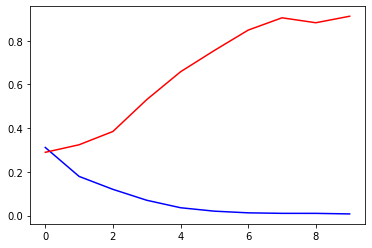

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],c='b')
plt.plot(history.history['val_loss'],c='r')